In [299]:
import pandas as pd
import seaborn as sns
import numpy as np
from Scripts.dirty_accuracy import injection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Helper functions

KNClassification Functions

In [300]:
def KNClassification(X_train, y_train, X_test, y_test):
    K = []
    training = []
    test = []
    scores = {}

    for k in range(1, 20):
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(X_train, y_train)

        training_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        K.append(k)

        training.append(training_score)
        test.append(test_score)
        scores[k] = [training_score, test_score]

    return scores

Print scores

In [301]:
def printScores(scores):
    for keys, values in scores.items():
        print(keys, ':', values)

Plot scores

In [302]:
def plotScores(scores, title):
    labels = list(scores.keys())
    labels.insert(0,0)
    scoresDF = pd.DataFrame.from_dict(scores, orient='index', columns=['Train', 'Test'])
    plot = sns.lineplot(data=scoresDF)
    plot.set_xticks(range(len(scores)+1))
    plot.set_xticklabels(labels)
    plot.set_ylim(0.2,1.1)
    plot.set(xlabel ="N Neighbors", ylabel = "Performance", title =title)

ZS Detection and correction

In [303]:
def ZS(data, threshold):
    mean = np.mean(data)
    sd = np.std(data) # calculate standard deviation
    cleaned = [] # create empty list to store outliers
    for i in data: # detect outliers
        z = (i - mean) / sd  # calculate z-score
        if abs(z) > threshold:  # identify outliers
            cleaned.append(mean) # add to the empty list
        else:
            cleaned.append(i)
    return cleaned

## Pipeline implementation

Read the dataset from CSV file
Drop the ID column

In [304]:
ecoli = pd.read_csv("datasets/ecoli.csv", sep=',')
ecoli = ecoli.drop('1', axis=1)

Perform the injections of outliers
and append the original clean dataset to the list

In [305]:
ecoli_list = injection(df_pandas=ecoli, seed=10, name='ecoli', name_class='class')
ecoli_list.append(ecoli)

saved ecoli-accuracy50%
saved ecoli-accuracy60%
saved ecoli-accuracy70%
saved ecoli-accuracy80%
saved ecoli-accuracy90%


Reverse the list on order to have
0 - Original Dataset
1 - 10% Dirty dataset
2 - 20% Dirty dataset
3 - 30% Dirty dataset
4 - 40% Dirty dataset
5 - 50% Dirty dataset

In [306]:
ecoli_list.reverse()

### Performing KNeighbors Machine Learning classification
Dataset preparation

In [307]:
y = ecoli['class']
X = ecoli_list[1].drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Function to calculate scores

In [308]:
scores = KNClassification(X_train, y_train, X_test, y_test)
printScores(scores)

1 : [1.0, 0.5346534653465347]
2 : [0.8127659574468085, 0.594059405940594]
3 : [0.774468085106383, 0.6435643564356436]
4 : [0.7489361702127659, 0.6039603960396039]
5 : [0.7191489361702128, 0.6138613861386139]
6 : [0.723404255319149, 0.5742574257425742]
7 : [0.6893617021276596, 0.5742574257425742]
8 : [0.7063829787234043, 0.5742574257425742]
9 : [0.7063829787234043, 0.5841584158415841]
10 : [0.7106382978723405, 0.6237623762376238]
11 : [0.6936170212765957, 0.594059405940594]
12 : [0.7063829787234043, 0.6237623762376238]
13 : [0.7106382978723405, 0.6435643564356436]
14 : [0.6936170212765957, 0.6237623762376238]
15 : [0.6978723404255319, 0.594059405940594]
16 : [0.6893617021276596, 0.6138613861386139]
17 : [0.6978723404255319, 0.594059405940594]
18 : [0.6680851063829787, 0.5841584158415841]
19 : [0.6595744680851063, 0.5643564356435643]


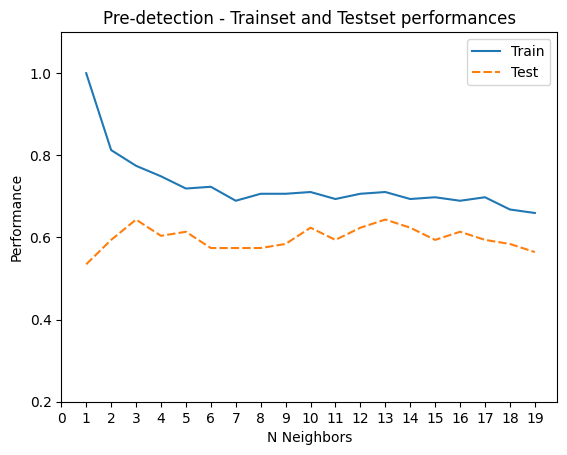

In [309]:
plotScores(scores, 'Pre-detection - Trainset and Testset performances')

Find column by column outliers using ZS and replace them with mean value

In [310]:
cleaned = ecoli_list[1].copy()
for col in cleaned.columns:
    if col == 'class':
        continue
    cleaned[col] = ZS(cleaned[col].values, 0.5)

Perform again the classification after outliers detection and print results

1 : [1.0, 0.7722772277227723]
2 : [0.8893617021276595, 0.7623762376237624]
3 : [0.8893617021276595, 0.8118811881188119]
4 : [0.8595744680851064, 0.7821782178217822]
5 : [0.8638297872340426, 0.8217821782178217]
6 : [0.8468085106382979, 0.7821782178217822]
7 : [0.825531914893617, 0.8415841584158416]
8 : [0.8212765957446808, 0.8217821782178217]
9 : [0.8382978723404255, 0.8217821782178217]
10 : [0.8340425531914893, 0.8316831683168316]
11 : [0.8212765957446808, 0.8217821782178217]
12 : [0.8085106382978723, 0.8118811881188119]
13 : [0.8170212765957446, 0.801980198019802]
14 : [0.8170212765957446, 0.8217821782178217]
15 : [0.8127659574468085, 0.8217821782178217]
16 : [0.825531914893617, 0.8118811881188119]
17 : [0.8170212765957446, 0.801980198019802]
18 : [0.8127659574468085, 0.801980198019802]
19 : [0.8, 0.7920792079207921]


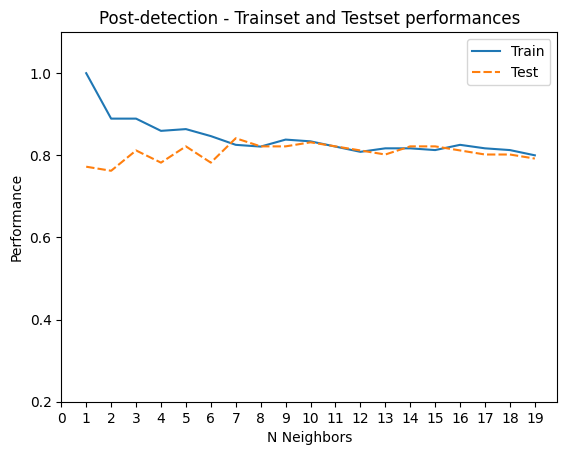

In [311]:
y = cleaned['class']
X = cleaned.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scores = KNClassification(X_train, y_train, X_test, y_test)
printScores(scores)
plotScores(scores, 'Post-detection - Trainset and Testset performances')